# Check Data Splits

In [2]:
import pandas as pd

import json
import ast
import matplotlib.pyplot as plt

from src.dataset import load_dataset

In [3]:
# df_fact_check, df_posts, df_fact_check_mapping = load_dataset(data_folder="data/complete_data", trial=False)
# df_fact_check = df_fact_check.reset_index()
# df_posts = df_posts.reset_index()

# df_posts.columns = ["ps_" + col if col not in ["post_id"] else col for col in df_posts.columns]
# df_fact_check.columns = ["fc_" + col if col not in ["fact_check_id"] else col for col in df_fact_check.columns]

# print(df_fact_check.shape, df_posts.shape, df_fact_check_mapping.shape)

# Load Data

In [4]:
tasks = json.load(open("data/complete_data/tasks.json"))

for task in tasks:
    print(task, "---------", list(tasks[task].keys()))
    for key in tasks[task]:
        print("\t", key, "---------", list(tasks[task][key])[:10])

monolingual --------- ['fra', 'spa', 'eng', 'por', 'tha', 'deu', 'msa', 'ara']
	 fra --------- ['fact_checks', 'posts_train', 'posts_dev']
	 spa --------- ['fact_checks', 'posts_train', 'posts_dev']
	 eng --------- ['fact_checks', 'posts_train', 'posts_dev']
	 por --------- ['fact_checks', 'posts_train', 'posts_dev']
	 tha --------- ['fact_checks', 'posts_train', 'posts_dev']
	 deu --------- ['fact_checks', 'posts_train', 'posts_dev']
	 msa --------- ['fact_checks', 'posts_train', 'posts_dev']
	 ara --------- ['fact_checks', 'posts_train', 'posts_dev']
crosslingual --------- ['fact_checks', 'posts_train', 'posts_dev']
	 fact_checks --------- [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	 posts_train --------- [3, 16, 30, 60, 62, 71, 74, 75, 76, 77]
	 posts_dev --------- [34, 57, 116, 133, 283, 309, 322, 351, 354, 373]


# Monolingual vs Crosslingual

In [5]:
d_mono = {}
d_stats_mono = {"unique": {}, "total": {}, "mean": {}}
for lan, d_lan in tasks["monolingual"].items():
    for split, indices_split in d_lan.items():
        if split not in d_mono:
            d_mono[split] = []
            d_stats_mono["total"][split] = 0
            d_stats_mono["unique"][split] = 0
            d_stats_mono["mean"][split] = 0

        d_mono[split] += indices_split
        d_stats_mono["unique"][split] += len(set(indices_split))
        d_stats_mono["total"][split] += len(indices_split)
        d_stats_mono["mean"][split] += d_stats_mono["total"][split] / len(tasks["monolingual"])


d_stats_mono

{'unique': {'fact_checks': 153743, 'posts_train': 17016, 'posts_dev': 1891},
 'total': {'fact_checks': 153743, 'posts_train': 17016, 'posts_dev': 1891},
 'mean': {'fact_checks': 100403.5,
  'posts_train': 12223.25,
  'posts_dev': 1361.5}}

**Conclusion Monolingual**: Splits are disjoints for each language. There aren't any overlapping between languages in terms of posts or fact_checks.

In [6]:
{k: v[:10] for k, v in d_mono.items()}

{'fact_checks': [15, 136, 155, 156, 187, 214, 584, 1187, 1193, 1231],
 'posts_train': [64, 79, 86, 182, 192, 247, 291, 307, 341, 347],
 'posts_dev': [158, 565, 602, 714, 734, 803, 869, 1106, 1556, 2206]}

In [7]:
d_cross = {}
d_stats_cross = {k: len(v) for k, v in tasks["crosslingual"].items()}
d_stats_cross

{'fact_checks': 153743, 'posts_train': 4972, 'posts_dev': 552}

**Conclusion Crosslingual**: The amount of fact checks now is way bigger than the amount of posts. This is because the fact checks are shared between languages. The posts are still disjoint for each language.

Text(0.5, 1.0, 'Number of posts per task')

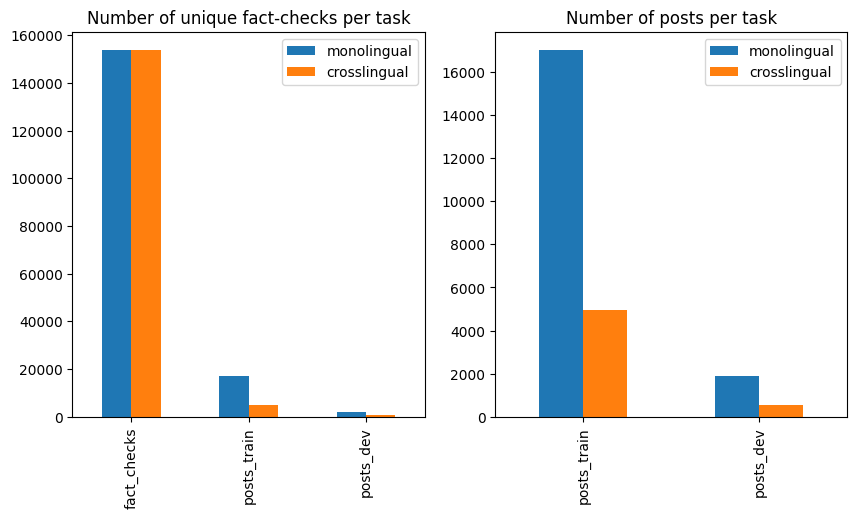

In [8]:
d_stats = {}
d_stats["monolingual"] = d_stats_mono["unique"]
d_stats["crosslingual"] = d_stats_cross

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_stats = pd.DataFrame(d_stats)
df_stats.plot(kind="bar", ax=ax[0])
ax[0].set_title("Number of unique fact-checks per task")

df_stats.drop(index="fact_checks").plot(kind="bar", ax=ax[1])
ax[1].set_title("Number of posts per task")


In [9]:
df_stats

,monolingual,crosslingual
fact_checks,153743,153743
posts_train,17016,4972
posts_dev,1891,552


## Monolingual Language Distribution


In [10]:
df_mono = pd.DataFrame(tasks["monolingual"])
df_mono = df_mono.map(lambda x: ast.literal_eval(str(x)))
df_mono

,fra,spa,eng,por,tha,deu,msa,ara
fact_checks,"[15, 136, 155, 156, 187, 214, 584, 1187, 1193,...","[56, 58, 59, 64, 65, 73, 99, 175, 193, 209, 30...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 22,...","[13, 14, 37, 40, 42, 43, 44, 45, 46, 47, 48, 4...","[8144, 8145, 8857, 10587, 20642, 33944, 33945,...","[455, 803, 923, 968, 969, 1381, 1439, 1469, 14...","[23, 118, 465, 501, 558, 561, 657, 697, 820, 8...","[12, 18, 19, 20, 21, 161, 4844, 7348, 7349, 73..."
posts_train,"[64, 79, 86, 182, 192, 247, 291, 307, 341, 347...","[4, 6, 7, 8, 11, 12, 17, 21, 22, 23, 24, 27, 2...","[2, 5, 13, 14, 15, 19, 20, 36, 44, 46, 47, 51,...","[18, 33, 35, 39, 40, 41, 42, 50, 55, 65, 66, 6...","[72, 136, 203, 224, 377, 616, 1048, 1059, 1789...","[0, 9, 10, 25, 52, 95, 96, 98, 108, 120, 123, ...","[132, 144, 191, 197, 230, 255, 262, 263, 264, ...","[2512, 2513, 2524, 2530, 2532, 2533, 2534, 253..."
posts_dev,"[158, 565, 602, 714, 734, 803, 869, 1106, 1556...","[48, 149, 280, 324, 326, 411, 465, 496, 596, 6...","[1, 122, 125, 128, 229, 302, 313, 467, 469, 47...","[124, 216, 268, 361, 393, 409, 416, 637, 683, ...","[4023, 4032, 4042, 7144, 13453, 13454, 14327, ...","[61, 245, 506, 763, 766, 898, 1668, 1953, 2262...","[1641, 1707, 1866, 2439, 2883, 4121, 4212, 426...","[559, 2514, 2766, 3879, 3880, 3899, 22126, 228..."


In [11]:
df_mono_lens = df_mono.map(len).T
df_mono_lens

,fact_checks,posts_train,posts_dev
fra,4355,1596,188
spa,14082,5628,615
eng,85734,4351,478
por,21569,2571,302
tha,382,465,42
deu,4996,667,83
msa,8424,1062,105
ara,14201,676,78


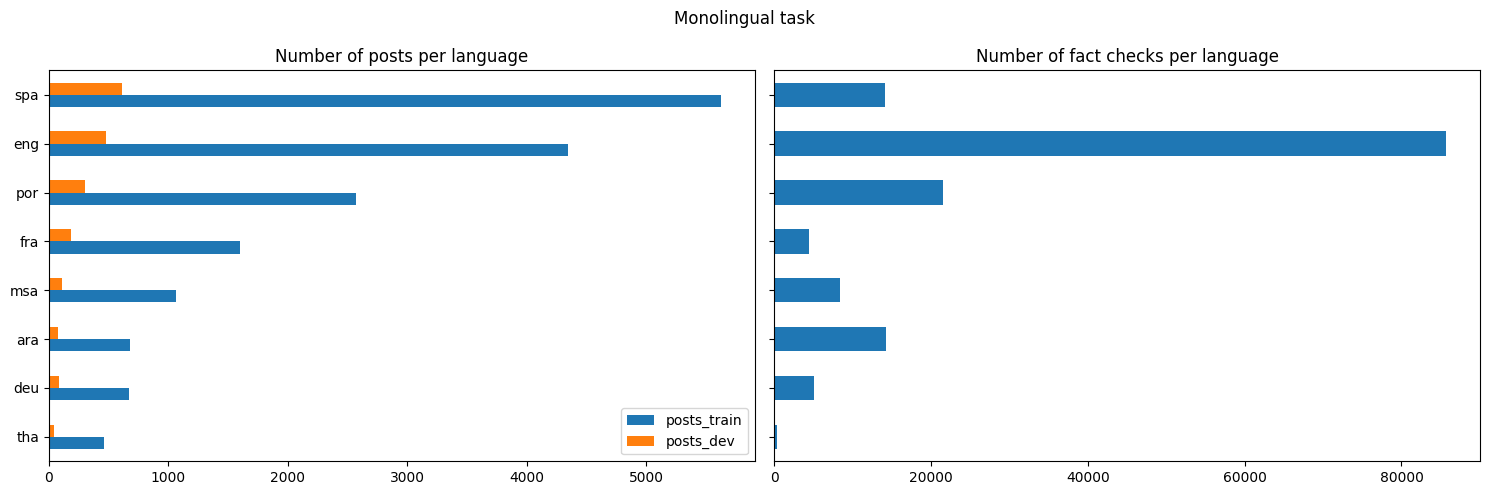

In [12]:
# Plot lengths to check the amount of data per language
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

df_mono_lens_plot = df_mono_lens.copy().sort_values(by="posts_train", ascending=True)

df_mono_lens_plot.drop(columns="fact_checks").plot(kind="barh", ax=ax[0])
ax[0].set_title("Number of posts per language")

df_mono_lens_plot["fact_checks"].plot(kind="barh", ax=ax[1])
ax[1].set_title("Number of fact checks per language")

fig.suptitle("Monolingual task")
fig.tight_layout()

- The language with more posts is Spanish with 5,628 posts
- The language with fewer posts is Thailandese with 465
- The language with more fact checks is English with 85,734
- The language with fewer fact checks is Thailandese with 382

In [13]:
df_mono_lens.sort_values(by="fact_checks", ascending=False)

,fact_checks,posts_train,posts_dev
eng,85734,4351,478
por,21569,2571,302
ara,14201,676,78
spa,14082,5628,615
msa,8424,1062,105
deu,4996,667,83
fra,4355,1596,188
tha,382,465,42


It is important to know, not only the total amount of posts and fact checks but also the ratio of of fact checks per post. This ratio is important to know because it can help us to understand the quality of the data. For example, if a language has a high ratio of fact checks per post, it could be that the language is more prone to fake news. On the other hand, if a language has a low ratio of fact checks per post, it could be that the language is more reliable.

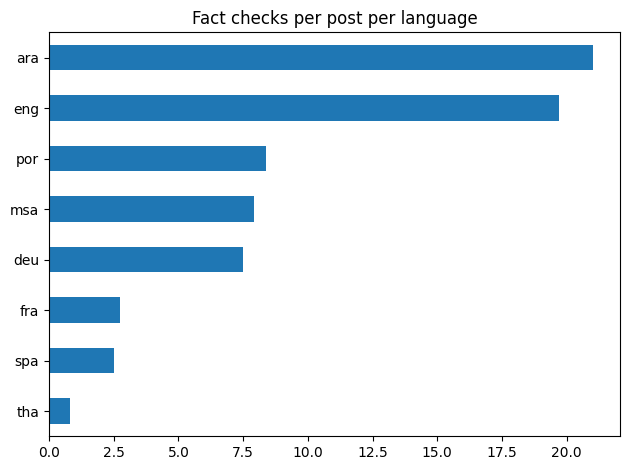

In [14]:
# Fact checks per post per language
df_mono_lens_plot["fact_checks_per_post"] = df_mono_lens_plot["fact_checks"] / df_mono_lens_plot["posts_train"]
df_mono_lens_plot["fact_checks_per_post"].sort_values(ascending=True).plot(kind="barh")
plt.title("Fact checks per post per language")
fig.suptitle("Monolingual task")
plt.tight_layout()

## Crosslingual Language Distribution

In [34]:
df_fact_check, df_posts, df_fact_check_mapping = load_dataset(data_folder="data/complete_data", trial=False)
df_fact_check = df_fact_check.reset_index()
df_posts = df_posts.reset_index()

df_posts.columns = ["ps_" + col if col not in ["post_id"] else col for col in df_posts.columns]
df_fact_check.columns = ["fc_" + col if col not in ["fact_check_id"] else col for col in df_fact_check.columns]

print(df_fact_check.shape, df_posts.shape, df_fact_check_mapping.shape)

(153743, 4) (24431, 5) (25743, 2)


In [72]:
df_posts_cl_train = df_posts[df_posts["post_id"].isin(tasks["crosslingual"]["posts_train"])]
df_posts_cl_train

,post_id,ps_instances,ps_ocr,ps_verdicts,ps_text
3,3,"[(1645187790.0, ig)]","[(""Australia 50 MILLONES de dosis de ""vacuna"" ...",[False],
16,16,"[(1633129058.0, fb)]","[(""Estrictamente y hablando con sentido, la co...",[Partly false information],
29,30,"[(1598378047.0, fb)]","[(""No es necesario creer en Dios para ser una ...",[False information],
56,60,"[(1631046537.0, fb)]",[(#Artés Presidente #Save Palestine ... [USER]...,[Partly false information],
58,62,"[(1649941805.0, fb)]",[(#CNN: Child soldiers are ok if they are to d...,[Altered photo],
...,...,...,...,...,...
24404,28056,"[(1643613736.0, fb)]","[(Foto: EPA Es ist nur eine Frage von Zeit, bi...",[Altered photo],"(🤮, 🤮, [(und, 1.0)])"
24416,28074,"[(1629072979.0, fb), (1629072967.0, fb)]",[],[False information],(🦑 Ladrão desembarcou hoje em recife olha a mu...
24427,28087,"[(1653138895.0, fb)]",[(bruising runny ed 1 e Contents of the pack a...,[Missing context],"(🧐🧐🧐, 🧐🧐🧐, [(eng, 1.0)])"
24429,28090,"[(1646255245.0, tw)]",[(Number of Covid-19 Deaths 4500 4000 3500 300...,[],(🧵Enquanto você se distrai com a invasão da Rú...


In [70]:
df_fact_check_cl = df_fact_check[df_fact_check["fact_check_id"].isin(tasks["crosslingual"]["fact_checks"])]
df_fact_check_cl.head(10)

,fact_check_id,fc_claim,fc_instances,fc_title
0,0,"( Are avocados good for you?, Are avocados go...","[(1525653998.0, https://metafact.io/factchecks...",
1,1,"( Can animals have headaches?, Can animals ha...","[(1617955634.0, https://metafact.io/factchecks...",
2,2,"( Can we help prevent Alzheimer's with diet?, ...","[(1525653998.0, https://metafact.io/factchecks...",
3,3,( Do any benefits of alcohol outweigh the risk...,"[(1525653998.0, https://metafact.io/factchecks...",
4,4,"( Does acupuncture work for headaches?, Does ...","[(1617955595.0, https://metafact.io/factchecks...",
5,5,"( Does lack of sleep trigger headaches?, Does...","[(1617955627.0, https://metafact.io/factchecks...",
6,6,"( Does marijuana harm the brain?, Does mariju...","[(1525653998.0, https://metafact.io/factchecks...",
7,7,"( Is Autism prevalence increasing?, Is Autism...","[(1525653999.0, https://metafact.io/factchecks...",
8,8,( Is it better to drink little alcohol than no...,"[(1525653998.0, https://metafact.io/factchecks...",
9,9,( Is there a psychological component to headac...,"[(1617955644.0, https://metafact.io/factchecks...",


In [57]:
df_fact_check_cl["fc_instances"].apply(lambda x: x[0][1] if (isinstance(x[0], tuple))&(len(x)>0) else x)

0         https://metafact.io/factchecks/175-are-avocado...
1         https://metafact.io/factchecks/1754-can-animal...
2         https://metafact.io/factchecks/173-can-we-help...
3         https://metafact.io/factchecks/172-do-any-bene...
4         https://metafact.io/factchecks/1752-does-acupu...
                                ...                        
153738    https://factuel.afp.com/ar/French-police-demon...
153739    https://youturn.in/articles/child-in-mangalore...
153740    https://factuel.afp.com/ar/this-photo-shows-a-...
153741    https://www.boatos.org/tecnologia/whatsapp-cob...
153742    https://projetocomprova.com.br/publica%C3%A7%C...
Name: fc_instances, Length: 153743, dtype: object

In [45]:
df_posts_cl_train["ps_text"].apply(lambda x: x[0] if isinstance(x, tuple) else x)

3                                                         
16                                                        
29                                                        
56                                                        
58                                                        
                               ...                        
24404                                                    🤮
24416    🦑 Ladrão desembarcou hoje em recife olha a mul...
24427                                                  🧐🧐🧐
24429    🧵Enquanto você se distrai com a invasão da Rús...
24430    🧿 대통령은 아바타... "대통령님, 말문 막히시면 원론적인 답변부터 하시며 시간을...
Name: ps_text, Length: 4972, dtype: object

In [78]:
df_fact_check_cl["fc_claim"].apply(lambda x: x[1] if isinstance(x, tuple) else x)

0                                Are avocados good for you?
1                               Can animals have headaches?
2                Can we help prevent Alzheimer's with diet?
3            Do any benefits of alcohol outweigh the risks?
4                      Does acupuncture work for headaches?
                                ...                        
153738    🇫🇷 In France, the military and civilian police...
153739    👆This little beautiful girl was seen in Mangal...
153740    📌 Italians and foreigners, men and women, chil...
153741    🔵Confirmed... Tomorrow the free messages will ...
153742    🕋🗃 WE OPEN THE BLACK BOX OF BNDES.......\n✅ DU...
Name: fc_claim, Length: 153743, dtype: object

In [84]:
df_posts_cl_train[df_posts_cl_train["post_id"]==28090]

,post_id,ps_instances,ps_ocr,ps_verdicts,ps_text
24429,28090,"[(1646255245.0, tw)]",[(Number of Covid-19 Deaths 4500 4000 3500 300...,[],(🧵Enquanto você se distrai com a invasão da Rú...


In [85]:
def get_post_info(post_id):
    text = df_posts_cl_train[df_posts_cl_train["post_id"] == post_id].ps_text.values[0]
    ocr = df_posts_cl_train[df_posts_cl_train["post_id"] == post_id].ps_ocr.values[0]

    text_orig = text[0] if isinstance(text, tuple) else text
    text_en = text[1] if isinstance(text, tuple) else text
    text_ocr = ocr[0][0] if len(ocr[0]) > 0 else ""
    text_lan = ocr[0][1][0][0] if len(ocr[0]) > 0 else ""

    text_en_total = (text_en + " [OCR] " + text_ocr ) if text_lan == "eng" else text_en
    text_orig_total = (text_orig + " [OCR] " + text_ocr) if text_lan not in ["eng", ""] else text_orig

    return text_orig_total, text_en_total
    # fact_check_id = df_fact_check_mapping[df_fact_check_mapping["post_id"] == post_id].fact_check_id.values[0]

    # claim = df_fact_check_cl[df_fact_check_cl["fact_check_id"] == fact_check_id].fc_claim.values[0][0]
    # claim_en = df_fact_check_cl[df_fact_check_cl["fact_check_id"] == fact_check_id].fc_claim.values[0][1]

    # fc_links = df_fact_check_cl[df_fact_check_cl["fact_check_id"] == fact_check_id].fc_instances.values[0]
    
    # return post, post_en, claim, claim_en, fc_links

get_post_info(28090)

('🧵Enquanto você se distrai com a invasão da Rússia, o governo do Reino Unido divulgou um relatório confirmando que os totalmente vacinados agora representam 9 em cada 10 mortes por Covid-19 na Inglaterra. ⤵️ [URL] [OCR] Number of Covid-19 Deaths 4500 4000 3500 3000 2500 2000 1500 1000 500 0 Number of Covid-19 Deaths by Vaccination Status in England 24th Jan to 20th Feb 22 Source: UKHSA Vaccine Surveillance Report - Week 8 - 2022 559 Not Vaccinated TheExpose.uk 147 One Dose Vaccinated 1035 Two Dose Vaccinated 3120 Three Dose Vaccinated 4302 Vaccinated',
 '🧵While you are distracted by the invasion of Russia, the UK government has released a report confirming that the fully vaccinated now account for 9 out of 10 Covid-19 deaths in England. ⤵️ [URL]')

In [65]:
post_id = 28090
post_en = df_posts_cl_train[df_posts_cl_train["post_id"] == post_id].ps_text.values[0][1]
print(post_en)

fact_check_id = df_fact_check_mapping[df_fact_check_mapping["post_id"] == post_id].fact_check_id.values[0]
claim_en = df_fact_check_cl[df_fact_check_cl["fact_check_id"] == fact_check_id].fc_claim.values[0][1]
print(claim_en)
fc_links = df_fact_check_cl[df_fact_check_cl["fact_check_id"] == fact_check_id].fc_instances.values[0]
print(fc_links)

🧵While you are distracted by the invasion of Russia, the UK government has released a report confirming that the fully vaccinated now account for 9 out of 10 Covid-19 deaths in England. ⤵️ [URL]
This data on deaths of vaccinees in England proves that immunizations against covid-19 don't work
[(1646867820.0, 'https://checamos.afp.com/doc.afp.com.324U277#8a7a726b5409576696009ac87396f08d')]


In [55]:
df_fact_check_mapping.groupby("post_id").size().sort_values(ascending=False)

post_id
5767     10
15782     6
16882     6
16570     6
17569     6
         ..
9764      1
9760      1
9758      1
9756      1
9771      1
Length: 21988, dtype: int64

In [16]:
fra_fc = tasks["monolingual"]["fra"]["fact_checks"]
fra_train = tasks["monolingual"]["fra"]["posts_train"]
fra_dev = tasks["monolingual"]["fra"]["posts_dev"]

In [17]:
df_posts

,post_id,ps_instances,ps_ocr,ps_verdicts,ps_text
0,0,"[(1608571882.0, fb)]",[(! Dreister Impf-Fake von Markus Söder! Es is...,[False information],
1,1,"[(1586139153.0, fb)]",[(!! WARNING !! A new thing circulating now. P...,[False information],
2,2,"[(1610052141.0, fb), (1610072448.0, fb)]","[(""Actually, he's a damn sight better than any...",[Missing context],
3,3,"[(1645187790.0, ig)]","[(""Australia 50 MILLONES de dosis de ""vacuna"" ...",[False],
4,4,"[(1581697500.0, fb)]","[(""Bienaventurados los perseguidos por mi caus...",[],
...,...,...,...,...,...
24426,28085,"[(1651921264.0, fb), (1651882168.0, fb)]",[],[Partly false information],(🧐Se separó el presidente...la constitución de...
24427,28087,"[(1653138895.0, fb)]",[(bruising runny ed 1 e Contents of the pack a...,[Missing context],"(🧐🧐🧐, 🧐🧐🧐, [(eng, 1.0)])"
24428,28089,"[(1657134606.0, fb)]",[],[Partly false information],"(🧬Robert Malone, inventeur de la technologie A..."
24429,28090,"[(1646255245.0, tw)]",[(Number of Covid-19 Deaths 4500 4000 3500 300...,[],(🧵Enquanto você se distrai com a invasão da Rú...


In [32]:
df_posts["ps_ocr"].apply(lambda x: x[0][0] if (len(x) > 0) else None)

0        ! Dreister Impf-Fake von Markus Söder! Es ist ...
1        !! WARNING !! A new thing circulating now. Peo...
2        "Actually, he's a damn sight better than any o...
3        "Australia 50 MILLONES de dosis de "vacuna" re...
4        "Bienaventurados los perseguidos por mi causa ...
                               ...                        
24426                                                 None
24427    bruising runny ed 1 e Contents of the pack and...
24428                                                 None
24429    Number of Covid-19 Deaths 4500 4000 3500 3000 ...
24430                        대중성과 발 전문적인 답반부터 하시면 시간방에 보십시
Name: ps_ocr, Length: 24431, dtype: object

In [29]:
df_fact_check["fc_claim"].apply(lambda x: x[0] if (type(x) == tuple) else None)

0                                Are avocados good for you?
1                               Can animals have headaches?
2                Can we help prevent Alzheimer's with diet?
3            Do any benefits of alcohol outweigh the risks?
4                      Does acupuncture work for headaches?
                                ...                        
153738    🇫🇷 في فرنسا ، يقرر رجال الشرطة العسكرية والمدن...
153739    👆This little beautiful girl was seen in Mangal...
153740    📌إيطاليين و أجانب رجال و نساء ، أطفال و عجزة ا...
153741    🔵Confirmado... Amanhã acabarão as mensagens gr...
153742    🕋🗃ABRIMOS A CAIXA PRETA DO BNDES.........\n✅DU...
Name: fc_claim, Length: 153743, dtype: object

In [18]:
df_posts_fra = df_posts[df_posts["post_id"].isin(fra_train)]
df_posts_fra.head()

,post_id,ps_instances,ps_ocr,ps_verdicts,ps_text
60,64,"[(1610984995.0, fb)]",[(#CouvreFeu18h00: Le gouvernement envisage de...,[],
75,79,"[(1594053796.0, fb)]",[(* L'eau froide ferme 4 veines du cœur et pro...,[False information],
82,86,"[(1620518306.0, fb)]",[(*ALERTE INFO DU MINISTERE DE LA SANTE.* Fait...,[False information],
164,182,"[(1613852722.0, fb)]","[(14 h 24 À compter du 1er mars 2021, le CONFI...",[False information],
171,192,"[(1584298244.0, fb)]",[(15:15 : = all 5% La FRANCE au STADE 4 Ce que...,[False information],


In [19]:
df_fc_fra = df_fact_check[df_fact_check["fact_check_id"].isin(fra_fc)]
df_fc_fra.head()

,fact_check_id,fc_claim,fc_instances,fc_title
15,15,"("" Il y a une vidéo qui sera lancée demain à W...","[(1642118340.0, https://www.20minutes.fr/high-...",(WhatsApp : Une vidéo « Martinelli » qui va co...
123,136,"(""1960 on n’était que 3% des femmes alphabétis...","[(1596818311.0, http://africacheck.org/fr/fact...",(Fatou Sarr Sow se trompe sur le taux d’alphab...
136,155,"(""25% des effets secondaires liés aux vaccins ...","[(1633687435.0, https://www.liberation.fr/chec...",(Est-il vrai que 25% des effets secondaires de...
137,156,"(""26 groupes armés"" ont rendu les armes dans l...","[(1620841200.0, https://factuel.afp.com/non-le...","(Non, les autorités congolaises n’ont pas enre..."
165,187,"(""5 % des élèves consomment de la drogue""., ""5...","[(1583150530.0, http://africacheck.org/fr/fact...",(Sénégal : 5 % des élèves consomment-ils de la...


In [20]:
df_fc_fra["fc_claim"].apply(lambda x: x[2] == [("fra", 1.0)] if len(x) > 2 else x).all()

np.True_

In [21]:
df_posts.head()

,post_id,ps_instances,ps_ocr,ps_verdicts,ps_text
0,0,"[(1608571882.0, fb)]",[(! Dreister Impf-Fake von Markus Söder! Es is...,[False information],
1,1,"[(1586139153.0, fb)]",[(!! WARNING !! A new thing circulating now. P...,[False information],
2,2,"[(1610052141.0, fb), (1610072448.0, fb)]","[(""Actually, he's a damn sight better than any...",[Missing context],
3,3,"[(1645187790.0, ig)]","[(""Australia 50 MILLONES de dosis de ""vacuna"" ...",[False],
4,4,"[(1581697500.0, fb)]","[(""Bienaventurados los perseguidos por mi caus...",[],


In [22]:
df_posts["ps_ocr"].apply(lambda x: x[0][-1] if len(x) > 0 else [])

0        [(deu, 0.9577142000198364), (fy, 0.03401247784...
1                                             [(eng, 1.0)]
2                                             [(eng, 1.0)]
3        [(fra, 0.5122882127761841), (spa, 0.3978404998...
4                                             [(spa, 1.0)]
                               ...                        
24426                                                   []
24427    [(eng, 0.9104688763618469), (deu, 0.0656138360...
24428                                                   []
24429                          [(eng, 0.7624319791793823)]
24430                                         [(kor, 1.0)]
Name: ps_ocr, Length: 24431, dtype: object

In [23]:
df_fact_check["fc_claim"].explode()

0                                Are avocados good for you?
0                                Are avocados good for you?
0                                              [(eng, 1.0)]
1                               Can animals have headaches?
1                               Can animals have headaches?
                                ...                        
153741    🔵Confirmed... Tomorrow the free messages will ...
153741                                         [(por, 1.0)]
153742    🕋🗃ABRIMOS A CAIXA PRETA DO BNDES.........\n✅DU...
153742    🕋🗃 WE OPEN THE BLACK BOX OF BNDES.......\n✅ DU...
153742                                         [(por, 1.0)]
Name: fc_claim, Length: 461229, dtype: object

In [24]:
df_fact_check_mapping.head()

,post_id,fact_check_id
0,2228,33
1,2228,23568
2,2228,194577
3,2229,33
4,2229,23568
